# Load all packages you need 

In [1]:
using Pkg, CSV, DataFrames, Statistics, OnlineStats, StatsBase, Plots, Distributions, StatsPlots, GLM, MLBase, StatsBase, StatsModels

# install the package for IV regrxession

In [166]:
Pkg.add("Econometrics")
Pkg.add("Microeconometrics")
Pkg.add("RegressionTables")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Vcov ────────────── v0.4.3
   Installed RegressionTables ── v0.5.1
   Installed FixedEffects ────── v2.0.6
   Installed FixedEffectModels ─ v1.6.3
    Updating `~/.julia/environments/v1.6/Project.toml`
  [d519eb52] + RegressionTables v0.5.1
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [9d5cd8c9] + FixedEffectModels v1.6.3
  [c8885935] + FixedEffects v2.0.6
  [d519eb52] + RegressionTables v0.5.1
  [ec2bfdc2] + Vcov v0.4.3
Precompiling project...
  ✓ FixedEffects
  ✓ Vcov
  ✓ FixedEffectModels
  ✓ RegressionTables
  4 dependencies successfully precompiled in 8 seconds (239 already precompiled)


# now let's load the new package as well

In [168]:
using Econometrics, Microeconometrics, RegressionTables

# check whether you are in the correct working directory

In [3]:
pwd()

"/Users/ning/Library/Mobile Documents/com~apple~CloudDocs/Working_Directory/Tex_MD/Teaching/tutorial/6002/W4"

# check whether you have the data file in your working directory

In [4]:
readdir()

12-element Vector{String}:
 ".DS_Store"
 ".ipynb_checkpoints"
 "CARD.DTA"
 "CARD.csv"
 "Ecmt6002 (2021S1) Tutorial 4.pdf"
 "W4_Julia.ipynb"
 "W4_Python.html"
 "W4_Python.ipynb"
 "W4_R.html"
 "W4_R.ipynb"
 "W4_Stata.html"
 "W4_Stata.ipynb"

# load data, check the first 5 obs, last 5 obs and variable names in the data set

In [86]:
df = CSV.read("CARD.csv", DataFrame);

In [87]:
first(df, 5)

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14
,Int64,Int64,Int64,Int64,Int64,Int64?,Int64?,Int64,Int64,Int64
1,2,0,0,7,29,missing,missing,158413,1,0
2,3,0,0,12,27,8,8,380166,1,0
3,4,0,0,12,34,14,12,367470,1,0
4,5,1,1,11,27,11,12,380166,1,0
5,6,1,1,12,34,8,7,367470,1,0


In [88]:
last(df, 5)

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14
,Int64,Int64,Int64,Int64,Int64,Int64?,Int64?,Int64,Int64,Int64
1,5218,0,1,12,25,8,12,82135,1,0
2,5219,0,1,13,34,missing,missing,88765,1,0
3,5220,0,1,12,24,11,missing,89271,0,0
4,5221,0,1,12,31,missing,missing,110376,1,0
5,5225,0,1,13,26,missing,missing,81081,0,0


In [89]:
names(df)

34-element Vector{String}:
 "id"
 "nearc2"
 "nearc4"
 "educ"
 "age"
 "fatheduc"
 "motheduc"
 "weight"
 "momdad14"
 "sinmom14"
 "step14"
 "reg661"
 "reg662"
 ⋮
 "smsa"
 "south"
 "smsa66"
 "wage"
 "enroll"
 "KWW"
 "IQ"
 "married"
 "libcrd14"
 "exper"
 "lwage"
 "expersq"

### (a) OLS
$$\log\left(wage\right) = \beta_0 + \beta_1 \cdot educ + \beta_2 \cdot exper + \beta_3 \cdot exper^2 + \beta_4 \cdot black + \beta_5 \cdot SMSA + \beta_6 \cdot south + u$$

### if you use "Econometrics" package

In [90]:
model_a = fit(EconometricModel, # Indicates the default model
            @formula(lwage ~ educ + exper + expersq + black + smsa + south), # formula
            df)

Continuous Response Model
Number of observations: 3010
Null Loglikelihood: -1825.22
Loglikelihood: -1308.71
R-squared: 0.2905
LR Test: 1033.03 ∼ χ²(6) ⟹  Pr > χ² = 0.0000
Formula: lwage ~ 1 + educ + exper + expersq + black + smsa + south
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────────────
                   PE          SE       t-value  Pr > |t|        2.50%       97.50%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   4.73366     0.0676026    70.0219     <1e-99   4.60111      4.86622
educ          0.074009    0.00350543   21.1126     <1e-91   0.0671357    0.0808823
exper         0.0835958   0.00664779   12.575      <1e-34   0.0705612    0.0966305
expersq      -0.00224088  0.00031784   -7.05035    <1e-11  -0.00286409  -0.00161768
black        -0.189632    0.0176266   -10.7583     <1e-25  -0.224193    -0.15507
smsa          0.161423    0.0155733    10.3654     <1e-24   0.1

### if you use "Microeconometrics" package

In [91]:
Data_1  = df; #dataset 
Model_1 = @micromodel(response => lwage, control => educ + exper + expersq + black + smsa + south + 1); #model

In [92]:
model_1 = fit(OLS, Microdata(Data_1, Model_1))

───────────────────────────────────────────────────────────────────────────
              Estimate   St. Err.    t-stat.    p-value       C.I.  (95%)  
───────────────────────────────────────────────────────────────────────────
educ            0.0740     0.0036    20.3411     0.0000     0.0669   0.0811
exper           0.0836     0.0067    12.4289     0.0000     0.0704   0.0968
expersq        -0.0022     0.0003    -7.0513     0.0000    -0.0029  -0.0016
black          -0.1896     0.0174   -10.8889     0.0000    -0.2238  -0.1555
smsa            0.1614     0.0152    10.6480     0.0000     0.1317   0.1911
south          -0.1249     0.0153    -8.1420     0.0000    -0.1549  -0.0948
(Intercept)     4.7337     0.0701    67.5392     0.0000     4.5963   4.8710
───────────────────────────────────────────────────────────────────────────


### (b) OLS

$$\log\left(wage\right) = \beta_0 + \beta_1 \cdot educ + \beta_2 \cdot exper + \beta_3 \cdot exper^2 + \beta_4 \cdot black + \beta_5 \cdot SMSA + \beta_6 \cdot south + u$$

### by the OLS with IQ as the proxy to ability $(u)$.

In [93]:
model_b = fit(EconometricModel, # Indicates the default model
            @formula(lwage ~ educ + exper + expersq + black + smsa + south + IQ), # formula
            df)

Continuous Response Model
Number of observations: 2061
Null Loglikelihood: -1125.29
Loglikelihood: -861.69
R-squared: 0.2257
LR Test: 527.20 ∼ χ²(7) ⟹  Pr > χ² = 0.0000
Formula: lwage ~ 1 + educ + exper + expersq + black + smsa + south + IQ
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────────────
                   PE           SE      t-value  Pr > |t|        2.50%       97.50%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   4.48258     0.103596     43.2698     <1e-99   4.27942      4.68574
educ          0.0692646   0.00487203   14.2168     <1e-43   0.0597099    0.0788192
exper         0.0935215   0.00953556    9.80765    <1e-21   0.0748211    0.112222
expersq      -0.00267617  0.000491625  -5.44351    <1e-07  -0.00364031  -0.00171203
black        -0.136135    0.0262767    -5.18083    <1e-06  -0.187667    -0.0846033
smsa          0.153351    0.0188749     8.1246     <1e-15  

### if you use Econometrics package

In [94]:
model_b = fit(EconometricModel, # Indicates the default model
            @formula(lwage ~ educ + exper + expersq + black + smsa + south + IQ), # formula
            df)

Continuous Response Model
Number of observations: 2061
Null Loglikelihood: -1125.29
Loglikelihood: -861.69
R-squared: 0.2257
LR Test: 527.20 ∼ χ²(7) ⟹  Pr > χ² = 0.0000
Formula: lwage ~ 1 + educ + exper + expersq + black + smsa + south + IQ
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────────────
                   PE           SE      t-value  Pr > |t|        2.50%       97.50%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   4.48258     0.103596     43.2698     <1e-99   4.27942      4.68574
educ          0.0692646   0.00487203   14.2168     <1e-43   0.0597099    0.0788192
exper         0.0935215   0.00953556    9.80765    <1e-21   0.0748211    0.112222
expersq      -0.00267617  0.000491625  -5.44351    <1e-07  -0.00364031  -0.00171203
black        -0.136135    0.0262767    -5.18083    <1e-06  -0.187667    -0.0846033
smsa          0.153351    0.0188749     8.1246     <1e-15  

### if you use "Microeconometrics" package

In [95]:
Data_2  = dropmissing(select(df, [:lwage, :educ, :exper, :expersq, :black, :smsa, :south, :IQ])); #dataset 
Model_2 = @micromodel(response => lwage, control => educ + exper + expersq + black + smsa + south + IQ + 1); #model

In [96]:
model_2 = fit(OLS, Microdata(Data_2, Model_2))

───────────────────────────────────────────────────────────────────────────
              Estimate   St. Err.    t-stat.    p-value       C.I.  (95%)  
───────────────────────────────────────────────────────────────────────────
educ            0.0693     0.0051    13.6334     0.0000     0.0593   0.0792
exper           0.0935     0.0092    10.1451     0.0000     0.0755   0.1116
expersq        -0.0027     0.0005    -5.7494     0.0000    -0.0036  -0.0018
black          -0.1361     0.0270    -5.0407     0.0000    -0.1891  -0.0832
smsa            0.1534     0.0185     8.2747     0.0000     0.1170   0.1897
south          -0.0791     0.0185    -4.2770     0.0000    -0.1153  -0.0428
IQ              0.0025     0.0008     3.3581     0.0008     0.0011   0.0040
(Intercept)     4.4826     0.1095    40.9209     0.0000     4.2679   4.6973
───────────────────────────────────────────────────────────────────────────


### (d) 

### if you use Econometrics package

In [97]:
model_d = fit(EconometricModel, # Indicates the default model
            @formula(IQ ~ nearc4 + smsa + south), # formula
            df)

Continuous Response Model
Number of observations: 2061
Null Loglikelihood: -8562.64
Loglikelihood: -8518.82
R-squared: 0.0416
LR Test: 87.64 ∼ χ²(3) ⟹  Pr > χ² = 0.0000
Formula: IQ ~ 1 + nearc4 + smsa + south
Variance Covariance Estimator: OIM
──────────────────────────────────────────────────────────────────────────────
                  PE        SE       t-value  Pr > |t|        2.50%     97.50%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  102.655     0.8374    122.588      <1e-99  101.013      104.297
nearc4         0.890227  0.782144    1.13819    0.2552   -0.64365      2.4241
smsa           1.629     0.803441    2.02753    0.0427    0.0533579    3.20464
south         -5.99102   0.717666   -8.34791    <1e-15   -7.39844     -4.58359
──────────────────────────────────────────────────────────────────────────────

### if you use "Microeconometrics" package

In [98]:
Data_4  = dropmissing(select(df, [:IQ, :nearc4, :smsa, :south])); #dataset 
Model_4 = @micromodel(response => IQ, control => nearc4 + smsa + south + 1); #model

In [99]:
model_4 = fit(OLS, Microdata(Data_4, Model_4))

────────────────────────────────────────────────────────────────────────────
              Estimate   St. Err.    t-stat.    p-value       C.I.   (95%)  
────────────────────────────────────────────────────────────────────────────
nearc4          0.8902     0.7709     1.1548     0.2482    -0.6206    2.4011
smsa            1.6290     0.7814     2.0848     0.0371     0.0976    3.1604
south          -5.9910     0.7274    -8.2366     0.0000    -7.4166   -4.5654
(Intercept)   102.6549     0.7713   133.0917     0.0000   101.1432  104.1667
────────────────────────────────────────────────────────────────────────────


### (e) 

### if you use Econometrics package

In [100]:
model_e = fit(EconometricModel, # Indicates the default model
            @formula(educ ~ nearc4 + black + smsa + south), # formula
            df)

Continuous Response Model
Number of observations: 3010
Null Loglikelihood: -7234.34
Loglikelihood: -7051.68
R-squared: 0.1143
LR Test: 365.32 ∼ χ²(4) ⟹  Pr > χ² = 0.0000
Formula: educ ~ 1 + nearc4 + black + smsa + south
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────
                 PE        SE       t-value  Pr > |t|      2.50%     97.50%
───────────────────────────────────────────────────────────────────────────
(Intercept)  12.9578    0.114625  113.045      <1e-99  12.7331    13.1826
nearc4        0.33175   0.107067    3.09853    0.0020   0.121819   0.541682
black        -1.46377   0.115592  -12.6633     <1e-35  -1.69042   -1.23713
smsa          0.847795  0.109382    7.75075    <1e-13   0.633323   1.06227
south        -0.453838  0.102633   -4.42196    <1e-04  -0.655076  -0.2526
───────────────────────────────────────────────────────────────────────────

### if you use "Microeconometrics" package

In [101]:
Data_5  = df; #dataset 
Model_5 = @micromodel(response => educ, control => nearc4 + black + smsa + south + 1); #model

In [102]:
model_5 = fit(OLS, Microdata(Data_5, Model_5))

───────────────────────────────────────────────────────────────────────────
              Estimate   St. Err.    t-stat.    p-value       C.I.  (95%)  
───────────────────────────────────────────────────────────────────────────
nearc4          0.3318     0.1089     3.0459     0.0023     0.1183   0.5452
black          -1.4638     0.1156   -12.6611     0.0000    -1.6904  -1.2372
smsa            0.8478     0.1128     7.5126     0.0000     0.6266   1.0690
south          -0.4538     0.1034    -4.3897     0.0000    -0.6565  -0.2512
(Intercept)    12.9578     0.1114   116.3396     0.0000    12.7395  13.1761
───────────────────────────────────────────────────────────────────────────


### (f) 

### if you use Econometrics package

In [103]:
model_f = fit(EconometricModel, # Indicates the default model
            @formula(lwage ~ educ + exper + expersq + black + smsa + south + IQ + nearc4), # formula
            df)

Continuous Response Model
Number of observations: 2061
Null Loglikelihood: -1125.29
Loglikelihood: -861.50
R-squared: 0.2258
LR Test: 527.57 ∼ χ²(8) ⟹  Pr > χ² = 0.0000
Formula: lwage ~ 1 + educ + exper + expersq + black + smsa + south + IQ + nearc4
Variance Covariance Estimator: OIM
────────────────────────────────────────────────────────────────────────────────────
                   PE           SE       t-value  Pr > |t|        2.50%       97.50%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   4.48037     0.103676     43.2152      <1e-99   4.27705      4.68369
educ          0.0690458   0.00488607   14.1311      <1e-42   0.0594636    0.078628
exper         0.0935021   0.00953708    9.80406     <1e-21   0.0747987    0.112205
expersq      -0.00268008  0.000491743  -5.45017     <1e-07  -0.00364445  -0.00171571
black        -0.136696    0.026297     -5.19818     <1e-06  -0.188268    -0.0851247
smsa          0.149889    0.0197195     7.6

### if you use "Microeconometrics" package

In [104]:
Data_6  = dropmissing(select(df, [:lwage, :educ, :exper, :expersq, :black, :smsa, :south, :IQ, :nearc4])); #dataset 
Model_6 = @micromodel(response => lwage, control => educ + exper + expersq + black + smsa + south + IQ + nearc4 + 1); #model

In [105]:
model_6 = fit(OLS, Microdata(Data_6, Model_6))

───────────────────────────────────────────────────────────────────────────
              Estimate   St. Err.    t-stat.    p-value       C.I.  (95%)  
───────────────────────────────────────────────────────────────────────────
educ            0.0690     0.0051    13.5389     0.0000     0.0591   0.0790
exper           0.0935     0.0092    10.1401     0.0000     0.0754   0.1116
expersq        -0.0027     0.0005    -5.7518     0.0000    -0.0036  -0.0018
black          -0.1367     0.0271    -5.0506     0.0000    -0.1897  -0.0836
smsa            0.1499     0.0193     7.7597     0.0000     0.1120   0.1877
south          -0.0773     0.0187    -4.1287     0.0000    -0.1140  -0.0406
IQ              0.0025     0.0008     3.3518     0.0008     0.0010   0.0040
nearc4          0.0116     0.0190     0.6118     0.5407    -0.0256   0.0489
(Intercept)     4.4804     0.1095    40.9002     0.0000     4.2657   4.6951
───────────────────────────────────────────────────────────────────────────


### (g) 

### if you use Econometrics package

In [106]:
model_g = fit(EconometricModel,
            @formula(lwage ~ exper + expersq + black + smsa + south + (educ ~ nearc4)),
            df)

Continuous Response Model
Number of observations: 3010
Null Loglikelihood: -1825.22
Loglikelihood: -1441.22
R-squared: NaN
LR Test: 767.99 ∼ χ²(6) ⟹  Pr > χ² = 0.0000
Formula: lwage ~ 1 + exper + expersq + black + smsa + south + (educ ~ nearc4)
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────────────
                   PE           SE      t-value  Pr > |t|        2.50%       97.50%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   3.75278     0.829479      4.52426    <1e-05   2.12638      5.37919
exper         0.107498    0.0213042     5.04587    <1e-06   0.0657258    0.14927
expersq      -0.00228407  0.000334188  -6.83468    <1e-11  -0.00293933  -0.00162881
black        -0.130802    0.0528811    -2.47351    0.0134  -0.234489    -0.027115
smsa          0.131324    0.0301349     4.35787    <1e-04   0.0722366    0.190411
south        -0.104901    0.0230769    -4.54569    <1e-05 

### if you use "Microeconometrics" package

In [107]:
Data_7  = df; #dataset 
Model_7 = @micromodel(response => lwage, control => exper + expersq + black + smsa + south + 1, treatment => educ, instrument => nearc4); #model

In [108]:
model_7 = fit(IV, Microdata(Data_7, Model_7))

───────────────────────────────────────────────────────────────────────────
              Estimate   St. Err.    t-stat.    p-value       C.I.  (95%)  
───────────────────────────────────────────────────────────────────────────
educ            0.1323     0.0485     2.7260     0.0064     0.0372   0.2274
exper           0.1075     0.0211     5.0907     0.0000     0.0661   0.1489
expersq        -0.0023     0.0003    -6.5938     0.0000    -0.0030  -0.0016
black          -0.1308     0.0515    -2.5418     0.0110    -0.2317  -0.0299
smsa            0.1313     0.0298     4.4108     0.0000     0.0730   0.1897
south          -0.1049     0.0229    -4.5801     0.0000    -0.1498  -0.0600
(Intercept)     3.7528     0.8169     4.5940     0.0000     2.1517   5.3538
───────────────────────────────────────────────────────────────────────────


### (h)

### let's use Econometrics package

### there is no Hausman test in Julia, so I am writing one myself

### the se computation of OLS and IV-reg in Julia is a little bit different from Stata and Python; hence, the final test-stat and p-value is marginally different.

In [164]:
# firstly, run the OLS

model = lm(@formula(lwage ~ 1 + exper + expersq + black + smsa + south + educ), df);

function hm_test(model, model_g, sig_level)
    
    # step 2 : compute test statistic
    bB = coef(model_g)[2:7] - coef(model)[2:7];
    C  = inv(vcov(model_g)[2:7,2:7] - vcov(model)[2:7,2:7]);

    Hausman_stat = transpose(bB) * C * bB
    
    println("the test stat is ", Hausman_stat, "\n")
    
    # step 3 : compute right-tail p-value
    d = Chisq(1);
    p_val = ccdf(d, Hausman_stat)

    println("the p-value is ", p_val, "\n")
    
    #step 4: plot rejection/non-rejection region 
    lower_bar = -1
    upper_bar = Hausman_stat + 3

    lb = quantile(d, 1 - sig_level)

    rg_low = range(0, lb; length = 100)
    rg_upp = range(lb, upper_bar; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "blue", lw = 3, label = "non-rejection region of H0", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region of H0", legend = :topleft)
    display(plot!([Hausman_stat], seriestype = :vline, c="green", linewidth=3, label="test stat", title="Hausman test"))
    
end

hm_test (generic function with 1 method)

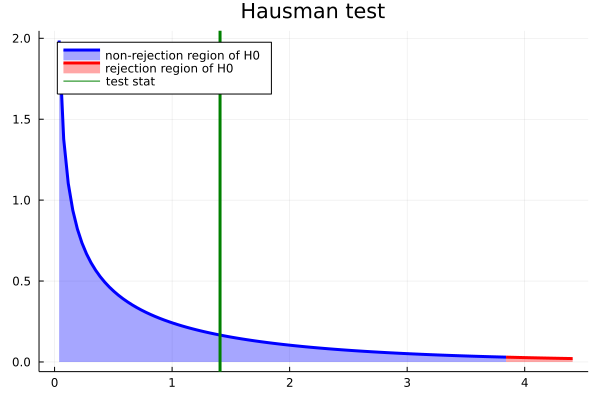

the test stat is 1.4079327788496587

the p-value is 0.2353998670282356



In [165]:
hm_test(model, model_g, 0.05)

In [174]:
etable(model_1, model_2, model_6, model_7; digits= 4, aux = stderror, stars=[0.1 "*"; 0.05 "**"; 0.01 "***"])

               (1)           (2)           (3)           (4)       
educ            0.0740***     0.0693***     0.0690***     0.1323***
               (0.0036)      (0.0051)      (0.0051)      (0.0485)  
exper           0.0836***     0.0935***     0.0935***     0.1075***
               (0.0067)      (0.0092)      (0.0092)      (0.0211)  
expersq        -0.0022***    -0.0027***    -0.0027***    -0.0023***
               (0.0003)      (0.0005)      (0.0005)      (0.0003)  
black          -0.1896***    -0.1361***    -0.1367***    -0.1308***
               (0.0174)      (0.0270)      (0.0271)      (0.0515)  
smsa            0.1614***     0.1534***     0.1499***     0.1313***
               (0.0152)      (0.0185)      (0.0193)      (0.0298)  
south          -0.1249***    -0.0791***    -0.0773***    -0.1049***
               (0.0153)      (0.0185)      (0.0187)      (0.0229)  
(Intercept)     4.7337***     0.0025***     0.0025***     3.7528***
               (0.0701)      (0.0008)      (0.00